In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparing data

In [46]:
docs = pd.read_csv('/content/SMSSpamCollection.csv')
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
docs['Class'].value_counts()

,count
Class,
ham,4825
spam,747


In [48]:
docs['Class'].value_counts()[1]

<ipython-input-48-914cc7b6252a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  docs['Class'].value_counts()[1]


747

In [49]:
spam_per = (docs['Class'].value_counts()[1] / (docs['Class'].value_counts()[0] + docs['Class'].value_counts()[1]))*100
print(f'Spam Percentage: {spam_per}')

Spam Percentage: 13.406317300789663


<ipython-input-49-9093f57c8190>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spam_per = (docs['Class'].value_counts()[1] / (docs['Class'].value_counts()[0] + docs['Class'].value_counts()[1]))*100
<ipython-input-49-9093f57c8190>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spam_per = (docs['Class'].value_counts()[1] / (docs['Class'].value_counts()[0] + docs['Class'].value_counts()[1]))*100
<ipython-input-49-9093f57c8190>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

In [50]:
# Map 'ham' to 0 and 'spam' to 1 in the 'label' column
docs['label'] = docs['Class'].map({'ham': 0, 'spam': 1})

print(docs.tail())


     Class                                                sms  label
5567  spam  This is the 2nd time we have tried 2 contact u...      1
5568   ham               Will ü b going to esplanade fr home?      0
5569   ham  Pity, * was in mood for that. So...any other s...      0
5570   ham  The guy did some bitching but I acted like i'd...      0
5571   ham                         Rofl. Its true to its name      0


In [51]:
X = docs.drop(['Class','label'], axis=1)

y = docs.iloc[:,2]

In [52]:
X.shape

(5572, 1)

In [53]:
y.shape

(5572,)

In [54]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


# Naive Bayes

In [55]:
X_train.head()

,sms
710,4mths half price Orange line rental & latest c...
3740,Did you stitch his trouser
2711,Hope you enjoyed your new content. text stop t...
3155,Not heard from U4 a while. Call 4 rude chat pr...
3748,Ü neva tell me how i noe... I'm not at home in...


## Vectorization of words

In [56]:
# Assuming the text data is in a column named 'text'
X_train = X_train.squeeze()  # Converts (4179, 1) to a Series (4179,)
X_test = X_test.squeeze()   # Converts (1393, 1) to a Series (1393,)


In [57]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer with stop words
vect = CountVectorizer(stop_words='english')

# Fit CountVectorizer on the training feature text (X_train)
X_train_vect = vect.fit_transform(X_train)


In [58]:
vocab = vect.vocabulary_

# Print the vocabulary size
print(f"Total number of unique words: {len(vocab)}")

Total number of unique words: 7204


In [59]:
vocab

{'4mths': 509,
 'half': 3089,
 'price': 5027,
 'orange': 4626,
 'line': 3852,
 'rental': 5310,
 'latest': 3763,
 'camera': 1527,
 'phones': 4822,
 'free': 2780,
 'phone': 4818,
 '11mths': 264,
 'mobilesdirect': 4248,
 '08000938767': 50,
 'update': 6673,
 'or2stoptxt': 4624,
 'cs': 1971,
 'did': 2169,
 'stitch': 6028,
 'trouser': 6545,
 'hope': 3260,
 'enjoyed': 2436,
 'new': 4442,
 'content': 1867,
 'text': 6321,
 'stop': 6038,
 '61610': 563,
 'unsubscribe': 6665,
 'help': 3180,
 '08712400602450p': 98,
 'provided': 5089,
 'tones2you': 6473,
 'uk': 6614,
 'heard': 3159,
 'u4': 6608,
 'rude': 5443,
 'chat': 1643,
 'private': 5040,
 '01223585334': 5,
 'cum': 1989,
 'wan': 6852,
 '2c': 374,
 'pics': 4837,
 'gettin': 2913,
 'shagged': 5628,
 'pix': 4858,
 '8552': 660,
 '2end': 378,
 'send': 5590,
 'sam': 5487,
 'xxx': 7127,
 'neva': 4438,
 'tell': 6289,
 'noe': 4477,
 'home': 3244,
 'da': 2015,
 'aft': 826,
 'wat': 6876,
 'wiskey': 7012,
 'brandy': 1389,
 'rum': 5450,
 'gin': 2927,
 'beer':

In [60]:
X_train_transformed = vect.transform(X_train.squeeze())  # Ensure X_train is a Series
X_test_transformed = vect.transform(X_test.squeeze())

In [61]:
# Convert the transformed X_train to an array
X_train_array = X_train_transformed.toarray()

# Print the first few rows to see the word counts
print("Transformed X_train data (first 5 rows):")
print(X_train_array[:5])

Transformed X_train data (first 5 rows):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [62]:
X_train_transformed.shape

(4179, 7204)

## Apply Naive bayes

1- Bernoulli Naive bayes

In [63]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

bnb = BernoulliNB()

bnb.fit(X_train_transformed, y_train)

y_pred_class = bnb.predict(X_test_transformed)

y_pred_proba = bnb.predict_proba(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.9770279971284996


### Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_class)

print("Confusion Matrix:")
print(confusion)

# Extract True Negative, False Positive, False Negative, and True Positive
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

Confusion Matrix:
[[1207    1]
 [  31  154]]


### Sensitivity and specificity

In [65]:
sensitivity = TP / (TP + FN)

print(f"Sensitivity: {sensitivity}")


Sensitivity: 0.8324324324324325


In [66]:
specificity = TN / (TN + FP)

print(f"Specificity: {specificity}")


Specificity: 0.9991721854304636


In [67]:
precision = TP / (TP + FP)

print(f"Precision: {precision}")


Precision: 0.9935483870967742


In [68]:
# Import classification_report
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1208
           1       0.99      0.83      0.91       185

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



## Creating ROC curve

In [69]:
from sklearn.metrics import roc_curve, auc

# Calculate false positive rate, true positive rate, and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Calculate AUC (Area Under the Curve)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Print AUC
print(f"AUC: {roc_auc}")


AUC: 0.9967692858421334


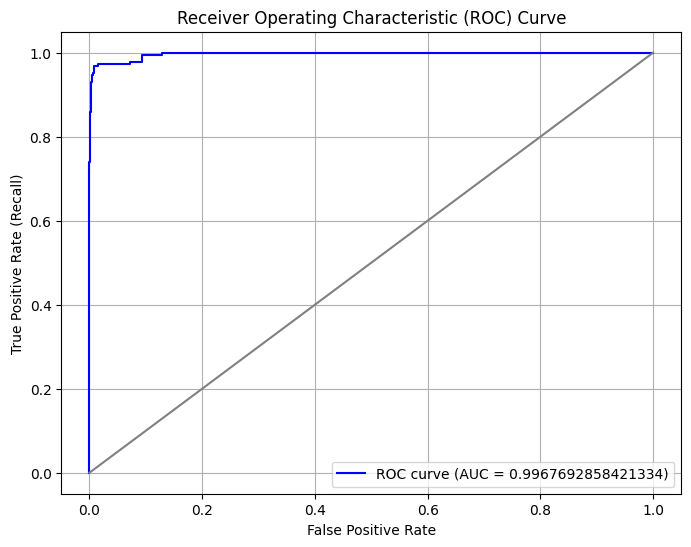

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='b', label=f'ROC curve (AUC = {roc_auc})')
plt.plot([0, 1], [0, 1], color='gray')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


The plot will show the ROC curve along with the AUC score. A higher AUC indicates better model performance.

# Multinoimial Naive Bayes

In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()

mnb.fit(X_train_transformed, y_train)

y_pred_class = mnb.predict(X_test_transformed)

y_pred_proba = mnb.predict_proba(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.9877961234745154


In [72]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_class)

print("Confusion Matrix:")
print(confusion)

TN, FP, FN, TP = confusion.ravel()


Confusion Matrix:
[[1201    7]
 [  10  175]]


In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1208
           1       0.96      0.95      0.95       185

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



## ROC curve

In [74]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

roc_auc = auc(false_positive_rate, true_positive_rate)

print(f"Area Under the Curve (AUC): {roc_auc}")


Area Under the Curve (AUC): 0.9921872203329157


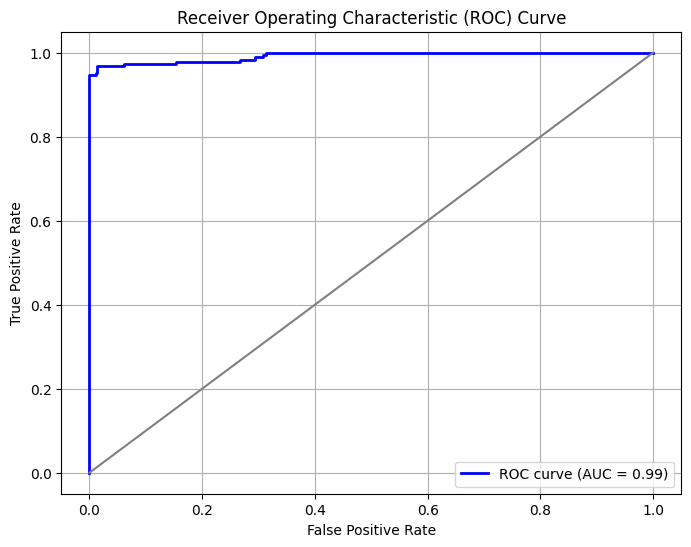

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Guassian Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()

gnb.fit(X_train_transformed.toarray(), y_train)

y_pred_class = gnb.predict(X_test_transformed.toarray())

y_pred_proba = gnb.predict_proba(X_test_transformed.toarray())

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_class)}')


Accuracy Score: 0.8901651112706389


In [77]:
confusion = confusion_matrix(y_test, y_pred_class)

print("Confusion Matrix:")
print(confusion)

TN, FP, FN, TP = confusion.ravel()

Confusion Matrix:
[[1066  142]
 [  11  174]]


In [78]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1208
           1       0.55      0.94      0.69       185

    accuracy                           0.89      1393
   macro avg       0.77      0.91      0.81      1393
weighted avg       0.93      0.89      0.90      1393



### ROC curve

In [79]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

roc_auc = auc(false_positive_rate, true_positive_rate)

print(f"Area Under the Curve (AUC): {roc_auc}")

Area Under the Curve (AUC): 0.9114954358331843


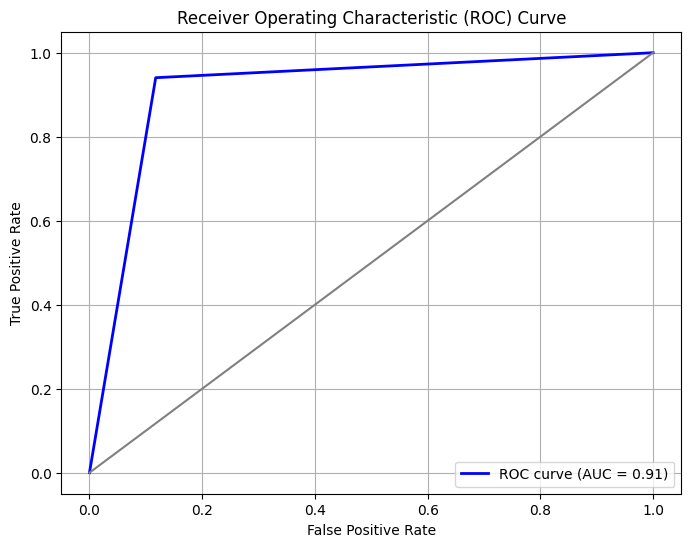

In [80]:
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Accuracy Score of all three Naive Bayes Algorithms

In [81]:
# Accuracy for Bernoulli Naive Bayes
bnb_accuracy = accuracy_score(y_test, bnb.predict(X_test_transformed))
print(f"Bernoulli Naive Bayes Accuracy: {bnb_accuracy}")

# Accuracy for Multinomial Naive Bayes
mnb_accuracy = accuracy_score(y_test, mnb.predict(X_test_transformed))
print(f"Multinomial Naive Bayes Accuracy: {mnb_accuracy}")

# Accuracy for Gaussian Naive Bayes
gnb_accuracy = accuracy_score(y_test, gnb.predict(X_test_transformed.toarray()))
print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy}")


Bernoulli Naive Bayes Accuracy: 0.9770279971284996
Multinomial Naive Bayes Accuracy: 0.9877961234745154
Gaussian Naive Bayes Accuracy: 0.8901651112706389


And hence it's proved that Multinomial Naive Bayes would solve this usecase of classifying spam messages correctly.

So here with this conclusion that Multinomial works better here because frequency of each feature word has occured more than once in many cases, and hence multinomial fits better in this case compared to Bernoulli and guassian Naive Bayes